In [16]:
import os as os
path = r'/home/falco/Desktop/directory/Cattle_AMR_2/'
os.chdir(r'/home/falco/Desktop/directory/Cattle_AMR_2/')
data_path = r"/home/falco/Desktop/directory/Cattle_AMR_2/data/"
output_path = r"/home/falco/Desktop/directory/Cattle_AMR_2/outputs/"

import sklearn
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
from pandas_ml import ConfusionMatrix
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style

import pandas.api.types as pdtypes

from plotnine import *
from plydata import *

np.random.seed(1234)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from functions import functions as f


style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']+1
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['figure.figsize'] = 8, 8

In [17]:
%%time
data, d = f.read_process_data(data_path=data_path)

reading datafile
fill missing values and correct some values
changing the column names
generating output variables
final R_factor output
1    213
0     30
Name: Ceftiofur, dtype: int64
0    204
1     39
Name: Tetracycline, dtype: int64
1    213
0     30
Name: Penicillin, dtype: int64
CPU times: user 562 ms, sys: 3.97 ms, total: 566 ms
Wall time: 557 ms


# Model Predictors

In [18]:
herd_parameters = [
    'HerdSize', 
    'RollingHerdAvg', 
    'Holstein',
    'Jersey',
    'CullPctMonth',
    'CullTimesMonth',
    'MainCullReason',
    'PctCullBeef',
    'PctCullCondemned',
    'PctInject',
    'VetTreats',
    'ManagerTreats',
    'StaffTreats',
    'ResiduePrevent',
    'Chalk4Withdrawal',
    'Inventory',
    'SeparateUse',
    'CombinationUse',
    'TrackAntibioticDose',
    'TrackAntibioticRoute',
    'FamiliarELDU',
    'FreqELDU',
    'NoELDU',
    'NumberCulled',
    'SalmonellaVaccine'
]

In [19]:
cow_parameters = ['LowMilkCull',
                  'ReproCull',
                  'LameCull',
                  'MastitisCull',
                  'OtherCull',
                  'AMD',
                  'Ani-Inf',
                  'No-Treatment',
                  'Other',
                  'Tetracycline',
                  'Penicillin',
                  'Ceftiofur',
                  'Season'
]

In [20]:
categorical = ['CullTimesMonth',
               'PctCullCondemned',
               'PctInject',
               'FreqELDU',
               'Season'
               ]

In [21]:
features = cow_parameters+ herd_parameters
len(features)

38

In [22]:
len(herd_parameters)

25

In [23]:
data['R_factor'].value_counts()

1    107
2     75
0     61
Name: R_factor, dtype: int64

In [31]:
data.Commensal_R.value_counts()

1    90
2    87
0    66
Name: Commensal_R, dtype: int64

In [32]:
data.Ecoli_R.value_counts()

0    162
1     74
2      7
Name: Ecoli_R, dtype: int64

In [34]:
data.Entero_R.value_counts()

1    92
0    86
2    65
Name: Entero_R, dtype: int64

In [36]:
data_m.Sal_R.value_counts()

0    37
1    19
2     5
Name: Sal_R, dtype: int64

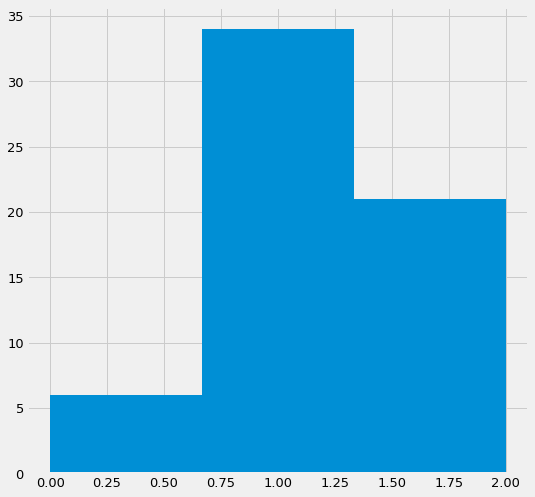

In [24]:
data_m = data[data['F_Salmonella PCR_Result'] == 'Positive']
plt.hist(data_m['R_factor'], bins=3)
plt.show()

In [25]:
data_m['R_factor'].value_counts()

1    34
2    21
0     6
Name: R_factor, dtype: int64

In [26]:
from model_functions import *

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Model 1 

## Random Forest

### Multi-drug resistance

In [28]:
tuned_parameters = [{
    
    'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 45, 50, 70],
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4, 6], 
    'min_samples_leaf': [1, 3, 4, 6, 7, 8]
    
}]

## all bacteria


    
    Testing and Training datasets and preprocessing
    
    
(170,)

    
    Simple cross validation with default parameters
    
    
[0.46551724 0.5        0.58928571]


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


              precision    recall  f1-score   support

           0       0.45      0.40      0.42        43
           1       0.49      0.57      0.53        75
           2       0.50      0.42      0.46        52

    accuracy                           0.48       170
   macro avg       0.48      0.46      0.47       170
weighted avg       0.48      0.48      0.48       170


    
    Plot shows internal validation of the random forest model with default parameters
    
    


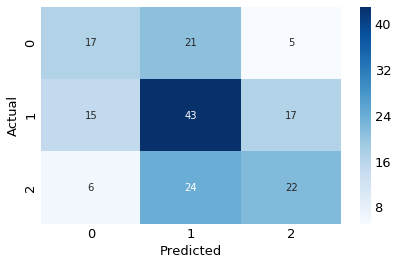


    
    Exrernal validation Multiple random forest model parameters are tested with k-fold cross validation (internal validation) method
    The cross validated model is then used on a "Holdout dataset" (data which is not seen by the model in cross validation)
    to understand its external validity.
    
    
    
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 100}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



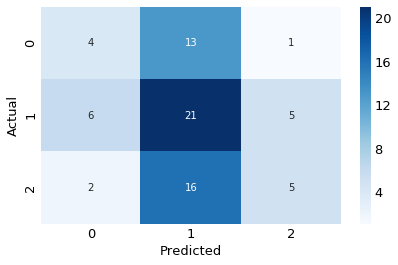

              precision    recall  f1-score   support

           0       0.33      0.22      0.27        18
           1       0.42      0.66      0.51        32
           2       0.45      0.22      0.29        23

    accuracy                           0.41        73
   macro avg       0.40      0.37      0.36        73
weighted avg       0.41      0.41      0.38        73

CPU times: user 1h 6min 31s, sys: 19.8 s, total: 1h 6min 51s
Wall time: 1h 6min 51s


In [14]:
%%time
rf = RandomForestClassifier()
run_classifier(clf=rf, k=3, 
               tuned_parameters=tuned_parameters, 
               y='R_factor', 
               cow_parameters= cow_parameters,
               herd_parameters = herd_parameters, 
               categorical=categorical, 
               data = data)

## Commensals


    
    Testing and Training datasets and preprocessing
    
    
(170,)

    
    Simple cross validation with default parameters
    
    
[0.56896552 0.41071429 0.42857143]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        46
           1       0.40      0.43      0.42        63
           2       0.58      0.56      0.57        61

    accuracy                           0.49       170
   macro avg       0.49      0.49      0.49       170
weighted avg       0.49      0.49      0.49       170


    
    Plot shows internal validation of the random forest model with default parameters
    
    


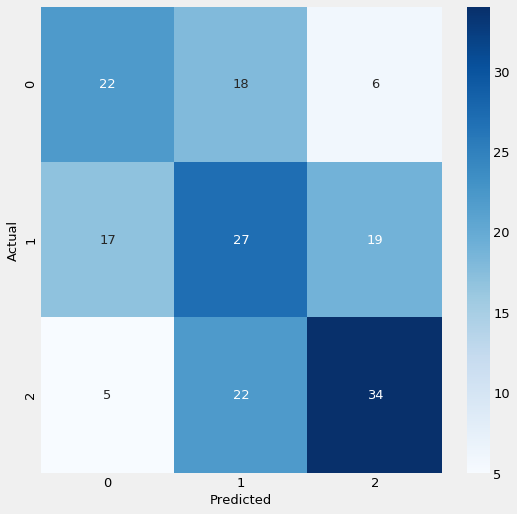


    
    Exrernal validation Multiple random forest model parameters are tested with k-fold cross validation (internal validation) method
    The cross validated model is then used on a "Holdout dataset" (data which is not seen by the model in cross validation)
    to understand its external validity.
    
    
    
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 100}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



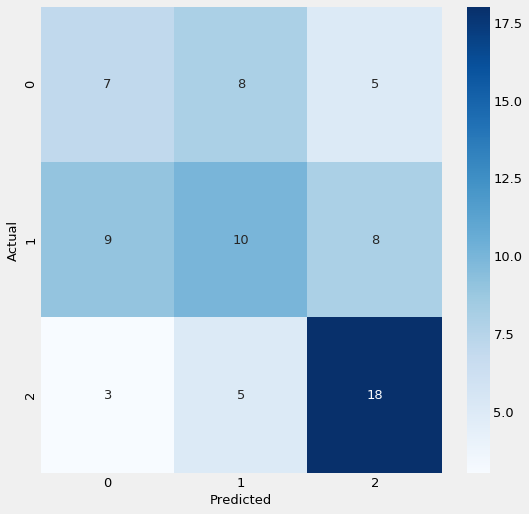

              precision    recall  f1-score   support

           0       0.37      0.35      0.36        20
           1       0.43      0.37      0.40        27
           2       0.58      0.69      0.63        26

    accuracy                           0.48        73
   macro avg       0.46      0.47      0.46        73
weighted avg       0.47      0.48      0.47        73

CPU times: user 1h 12min 36s, sys: 21.6 s, total: 1h 12min 58s
Wall time: 1h 12min 58s


In [37]:
%%time
rf = RandomForestClassifier()
run_classifier(clf=rf, k=3, 
               tuned_parameters=tuned_parameters, 
               y='Commensal_R', 
               cow_parameters= cow_parameters,
               herd_parameters = herd_parameters, 
               categorical=categorical, 
               data = data)

## Ecoli


    
    Testing and Training datasets and preprocessing
    
    
(170,)

    
    Simple cross validation with default parameters
    
    
[0.5        0.63157895 0.65454545]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       113
           1       0.46      0.46      0.46        52
           2       0.00      0.00      0.00         5

    accuracy                           0.65       170
   macro avg       0.40      0.41      0.40       170
weighted avg       0.63      0.65      0.64       170


    
    Plot shows internal validation of the random forest model with default parameters
    
    


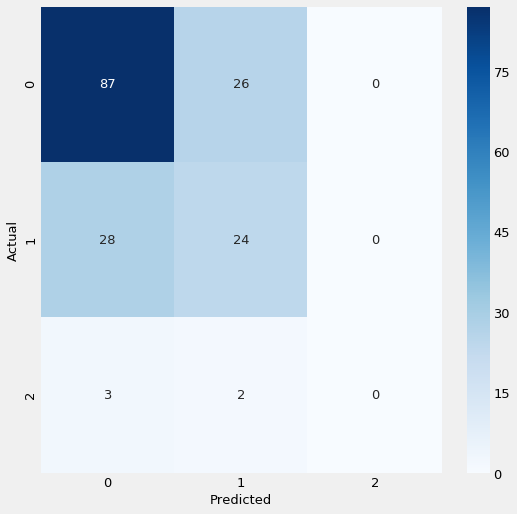


    
    Exrernal validation Multiple random forest model parameters are tested with k-fold cross validation (internal validation) method
    The cross validated model is then used on a "Holdout dataset" (data which is not seen by the model in cross validation)
    to understand its external validity.
    
    
    
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 100}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



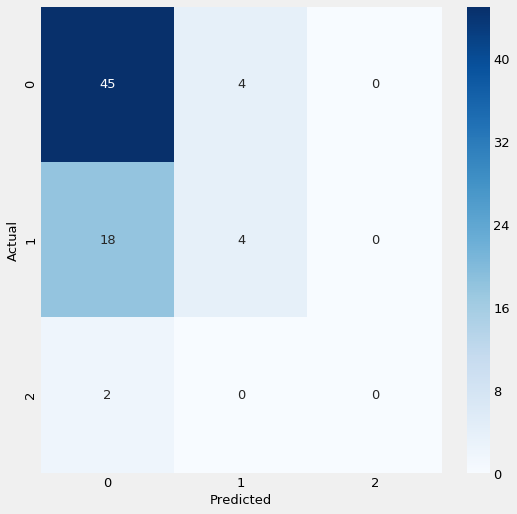

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        49
           1       0.50      0.18      0.27        22
           2       0.00      0.00      0.00         2

    accuracy                           0.67        73
   macro avg       0.40      0.37      0.35        73
weighted avg       0.62      0.67      0.61        73

CPU times: user 1h 11min 23s, sys: 20.8 s, total: 1h 11min 43s
Wall time: 1h 11min 43s


In [38]:
%%time
rf = RandomForestClassifier()
run_classifier(clf=rf, k=3, 
               tuned_parameters=tuned_parameters, 
               y='Ecoli_R', 
               cow_parameters= cow_parameters,
               herd_parameters = herd_parameters, 
               categorical=categorical, 
               data = data)

## Entercoccus


    
    Testing and Training datasets and preprocessing
    
    
(170,)

    
    Simple cross validation with default parameters
    
    
[0.55172414 0.375      0.5       ]
              precision    recall  f1-score   support

           0       0.56      0.55      0.55        60
           1       0.40      0.38      0.39        64
           2       0.53      0.59      0.56        46

    accuracy                           0.49       170
   macro avg       0.50      0.50      0.50       170
weighted avg       0.49      0.49      0.49       170


    
    Plot shows internal validation of the random forest model with default parameters
    
    


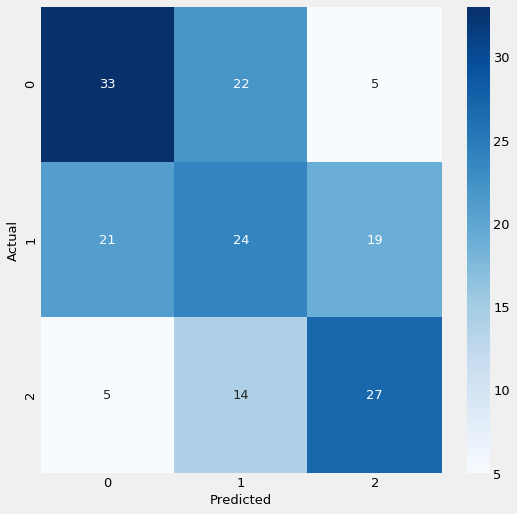


    
    Exrernal validation Multiple random forest model parameters are tested with k-fold cross validation (internal validation) method
    The cross validated model is then used on a "Holdout dataset" (data which is not seen by the model in cross validation)
    to understand its external validity.
    
    
    
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



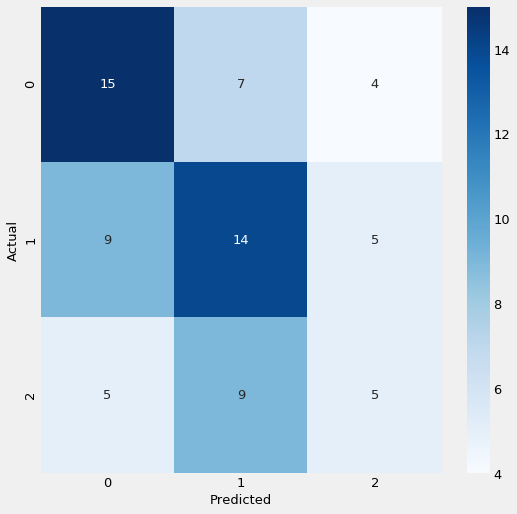

              precision    recall  f1-score   support

           0       0.52      0.58      0.55        26
           1       0.47      0.50      0.48        28
           2       0.36      0.26      0.30        19

    accuracy                           0.47        73
   macro avg       0.45      0.45      0.44        73
weighted avg       0.46      0.47      0.46        73

CPU times: user 1h 12min, sys: 21.4 s, total: 1h 12min 21s
Wall time: 1h 12min 21s


In [39]:
%%time
rf = RandomForestClassifier()
run_classifier(clf=rf, k=3, 
               tuned_parameters=tuned_parameters, 
               y='Entero_R', 
               cow_parameters= cow_parameters,
               herd_parameters = herd_parameters, 
               categorical=categorical, 
               data = data)

## Salmonella


    
    Testing and Training datasets and preprocessing
    
    
(42,)

    
    Simple cross validation with default parameters
    
    
[0.53333333 0.71428571 0.53846154]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.54      0.54      0.54        13
           2       0.00      0.00      0.00         3

    accuracy                           0.67        42
   macro avg       0.43      0.45      0.44        42
weighted avg       0.63      0.67      0.65        42


    
    Plot shows internal validation of the random forest model with default parameters
    
    


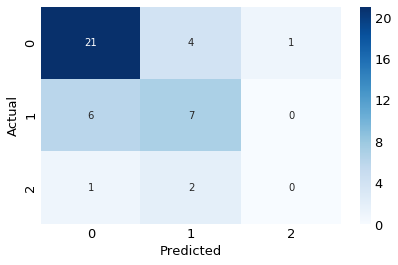


    
    Exrernal validation Multiple random forest model parameters are tested with k-fold cross validation (internal validation) method
    The cross validated model is then used on a "Holdout dataset" (data which is not seen by the model in cross validation)
    to understand its external validity.
    
    
    
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}

Grid scores on development set:


Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



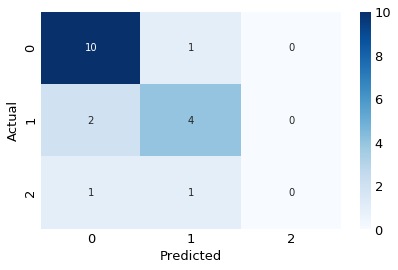

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         2

    accuracy                           0.74        19
   macro avg       0.48      0.53      0.50        19
weighted avg       0.66      0.74      0.69        19

CPU times: user 1h 1min 48s, sys: 19.4 s, total: 1h 2min 8s
Wall time: 1h 2min 7s


In [15]:
%%time
rf = RandomForestClassifier()
run_classifier(clf=rf, k=3, 
               tuned_parameters=tuned_parameters, 
               y='Sal_R', 
               cow_parameters= cow_parameters,
               herd_parameters = herd_parameters, 
               categorical=categorical, 
               data = data_m)